<a href="https://colab.research.google.com/github/labrijisaad/Git-Clustering/blob/main/notebooks/Acuracy Benchmark/GIT Accuracy Benchmark - Small Scale Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO

## <center><a><span style="color:blue">`Evaluating GIT` - Accuracy Benchmarking on Large-Scale Datasets</span></a></center>

#### Objective

The goal of this notebook is to benchmark the GIT clustering algorithm against other standard clustering algorithms using four classic **Large-scale datasets** (Face and FMNIST). We aim to evaluate the accuracy and performance of GIT in a controlled, comparative study.

In this benchmarking study, we will compare the GIT clustering algorithm with the following clustering techniques:

- HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)
- Spectral Clustering
- K-Means
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- Agglomerative Clustering
- Gaussian Mixture Models (GMM)

#### Install the `packages` & Prepare the `data` ( Install this if needed )

In [1]:
# !pip install -i "https://test.pypi.org/simple/" git_cluster > /dev/null 
# !pip install hdbscan > /dev/null
# !pip install -U gdown > /dev/null
# !gdown 1yNwCStP3Sdf2lfvNe9h0WIZw2OQ3O2UP && unzip datasets.zip > /dev/null

#### Import the Libraries

In [2]:
import warnings ; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from utils import measures_calculator, alignPredictedWithTrueLabels
from dataloaders import Real_DataLoader as Real_DataLoader

# Data Path (TO REPLACE in COLAB with "/content/datasets/real_datasets")
real_datasets_path = "../../datasets/real_datasets"

#### Note on **Clustering Performance Metrics**

##### F1 Score - **`F1`**
The F1 Score represents the harmonic mean of precision and recall. When applied to clustering, it assesses the correspondence between clusters and ground truth labels. It ranges from 0 to 1, with 1 indicating perfect precision and recall alignment.

##### Adjusted Rand Index - **`ARI`**
The ARI measures the similarity between two sets of data clusters, adjusted for chance. It offers a score that signifies whether the clustering is superior to random assignment. A value of 1 denotes a perfect match, 0 signifies random labeling, and negative values imply less agreement than expected by chance.

##### Accuracy - **`ACC`**
Accuracy in clustering is typically computed after aligning clusters with ground truth labels. It quantifies the proportion of correct predictions among the total predictions made. However, its utility is contingent upon such alignment, given that clustering doesn't inherently strive to replicate external labels.

##### Normalized Mutual Information - **`NMI`**
NMI is a modification of the Mutual Information (MI) score that considers cluster sizes and normalizes the score between 0 (no mutual information) and 1 (perfect correlation). It gauges the shared information between predicted clusters and true labels.

##### Cover Rate - **`Cover Rate`**
Cover rate usually indicates how effectively the clustering algorithm encompasses the dataset with its clusters. A cover rate of 1 indicates that each data point has been assigned to a cluster, while a value less than 1 suggests some data points remain unassigned.

##### Silhouette Score - **`Silhouette`** 
The Silhouette Score assesses cluster separation and cohesion, ranging from -1 (poor clustering) to 1 (clear, distinct clusters). It helps evaluate clustering quality without needing true labels.

## <center><a><span style="color:green">Real Datasets - `Face`</span></a></center>

### Load the Face data

In [3]:
X_face, Y_face_true = Real_DataLoader(name='face', path=real_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_face_true))
num_features = len(X_face[0])
total_rows = len(X_face)

# Print out the dataset characteristics
print(f"The 'face' Dataset has: {num_clusters} Clusters, {num_features} Features, and {total_rows} Total Rows.")

The 'face' Dataset has: 40 Clusters, 4096 Features, and 400 Total Rows.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

In [4]:
from git_cluster import GIT

In [5]:
# Create an instance of the GIT clustering
git = GIT(k=3, target_ratio=[1 for i in range(40)])

# Apply the GIT algorithm to predict the clusters in the data
Y_face_pred_git = git.fit_predict(X_face)

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_git, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_git, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_face = measures_calculator(X_face, Y_face_pred_git, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_face["Algo"] = git.__class__.__name__
perf_metrics_git_face["dataset"] = "face"

perf_metrics_git_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset
0,0.619206,0.446851,0.625,0.778978,0.105574,1.0,40,GIT,face


### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [6]:
import hdbscan

In [7]:
# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=5)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_face)

# Get the predicted Clusters
Y_face_pred_hdbscan = hdbscan.labels_

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_hdbscan, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_hdbscan, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_hdbscan_face = measures_calculator(X_face, Y_face_pred_hdbscan, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_hdbscan_face["Algo"] = hdbscan.__class__.__name__
perf_metrics_hdbscan_face["dataset"] = "face"

perf_metrics_hdbscan_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset
0,0.069682,0.016433,0.0475,0.187941,0.105574,1.0,40,HDBSCAN,face


### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [8]:
from sklearn.cluster import SpectralClustering

In [9]:
# Create an instance of the Spectral Clustering algorithm 
spectral_clustering = SpectralClustering(n_clusters=40, assign_labels="discretize", 
                                         random_state=0, affinity='rbf')

# Apply the Spectral Clustering algorithm to predict the clusters in the data
spectral_clustering.fit(X_face)

# Get the predicted Clusters
Y_face_pred_speclustr = spectral_clustering.labels_

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_speclustr, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_speclustr, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_speclustr_face = measures_calculator(X_face, Y_face_pred_speclustr, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_speclustr_face["Algo"] = spectral_clustering.__class__.__name__
perf_metrics_speclustr_face["dataset"] = "face"

perf_metrics_speclustr_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset
0,0.445543,0.216986,0.4075,0.665879,0.105574,1.0,40,SpectralClustering,face


### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=40, random_state=0)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_face)

# Get the predicted Clusters
Y_face_pred_kmeans = kmeans.labels_

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_kmeans, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_kmeans, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_kmeans_face = measures_calculator(X_face, Y_face_pred_kmeans, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_kmeans_face["Algo"] = kmeans.__class__.__name__
perf_metrics_kmeans_face["dataset"] = "face"

perf_metrics_kmeans_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset
0,0.582355,0.404255,0.575,0.753367,0.105574,1.0,40,KMeans,face


### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=100)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_face_pred_dbscan = dbscan.fit_predict(X_face)

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_dbscan, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_dbscan, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_dbscan_face = measures_calculator(X_face, Y_face_pred_dbscan, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_dbscan_face["Algo"] = dbscan.__class__.__name__
perf_metrics_dbscan_face["dataset"] = "face"

perf_metrics_dbscan_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset
0,0.018182,-0.000554,0.1,0.168332,0.105574,1.0,40,DBSCAN,face


### <span style="color:red">Agglomerative Clustering</span> <a class="anchor"></a>

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
# Create an instance of the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=40)

# Apply the Agglomerative Clustering algorithm to predict the clusters in the data
Y_face_pred_agg = agg_clustering.fit_predict(X_face)

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_agg, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_agg, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_agg_face = measures_calculator(X_face, Y_face_pred_agg, Y_face_true)
perf_metrics_agg_face

# Store additional information about the algorithm and dataset in the result
perf_metrics_agg_face["Algo"] = agg_clustering.__class__.__name__
perf_metrics_agg_face["dataset"] = "face"

perf_metrics_agg_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset
0,0.64566,0.470418,0.63,0.798782,0.105574,1.0,40,AgglomerativeClustering,face


### <span style="color:red">Gaussian Mixture Models (GMM)</span> <a class="anchor"></a>

In [16]:
from sklearn.mixture import GaussianMixture

In [17]:
# Create an instance of the Gaussian Mixture Models algorithm
gmm = GaussianMixture(n_components=40, random_state=0)

# Fit the Gaussian Mixture Models algorithm to the data and predict the clusters
gmm.fit(X_face)
Y_face_pred_gmm = gmm.predict(X_face)

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_gmm, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_gmm, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_gmm_face = measures_calculator(X_face, Y_face_pred_gmm, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_gmm_face["Algo"] = gmm.__class__.__name__
perf_metrics_gmm_face["dataset"] = "face"

perf_metrics_gmm_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset
0,0.582355,0.404255,0.575,0.753367,0.105574,1.0,40,GaussianMixture,face


### <span style="color:blue">Benchmark Results</span> <a class="anchor"></a>

In [18]:
full_perf_metrics_face = pd.concat([perf_metrics_git_face, 
                                    perf_metrics_hdbscan_face,
                                    perf_metrics_speclustr_face,
                                    perf_metrics_kmeans_face,
                                    perf_metrics_dbscan_face,
                                    perf_metrics_agg_face,
                                    perf_metrics_gmm_face], ignore_index=True)
full_perf_metrics_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset
0,0.619206,0.446851,0.6250,0.778978,0.105574,1.0,40,GIT,face
1,0.069682,0.016433,0.0475,0.187941,0.105574,1.0,40,HDBSCAN,face
2,0.445543,0.216986,0.4075,0.665879,0.105574,1.0,40,SpectralClustering,face
3,0.582355,0.404255,0.5750,0.753367,0.105574,1.0,40,KMeans,face
4,0.018182,-0.000554,0.1000,0.168332,0.105574,1.0,40,DBSCAN,face
5,0.645660,0.470418,0.6300,0.798782,0.105574,1.0,40,AgglomerativeClustering,face
6,0.582355,0.404255,0.5750,0.753367,0.105574,1.0,40,GaussianMixture,face


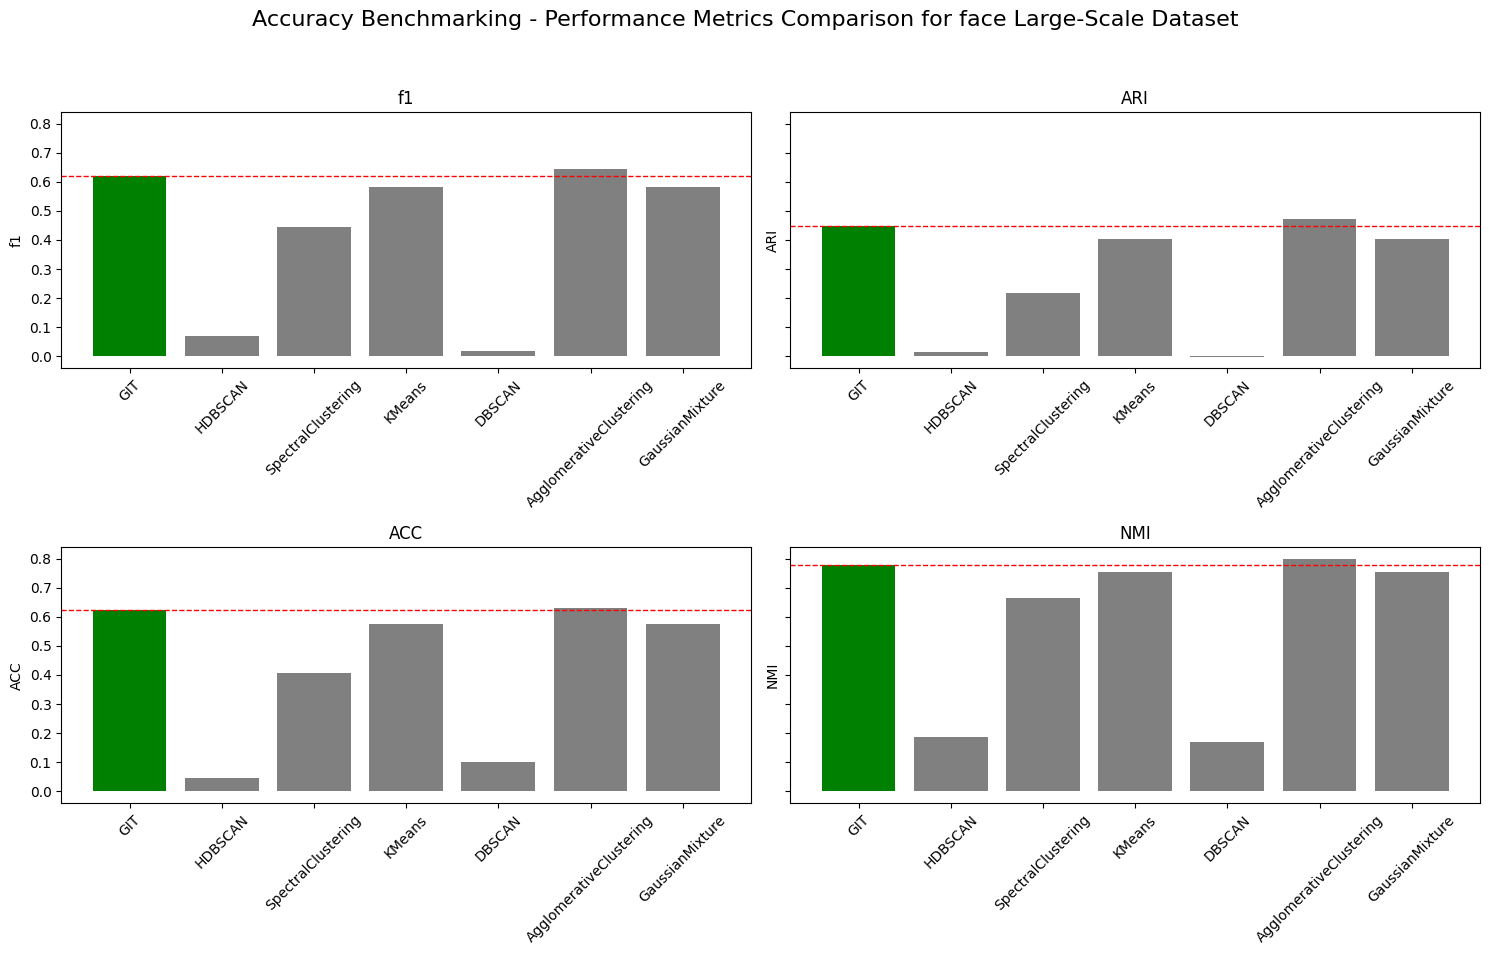

In [19]:
metrics = ['f1', 'ARI', 'ACC', 'NMI']
dataset_name = full_perf_metrics_face['dataset'].iloc[0]
benchmark_algo = 'GIT'

# Determine GIT scores for reference lines
git_scores = full_perf_metrics_face[full_perf_metrics_face['Algo'] == benchmark_algo][metrics].values.flatten()

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)
fig.suptitle(f'Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset', fontsize=16)

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    ax.bar(full_perf_metrics_face['Algo'], full_perf_metrics_face[metric], 
           color=['green' if x == benchmark_algo else 'grey' for x in full_perf_metrics_face['Algo']])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=git_scores[i], color='r', linestyle='--', linewidth=1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig(f'./Benchmark Figures/Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset.png', bbox_inches='tight')

# Show plot
plt.show()

## <center><a><span style="color:green">Real Datasets - `FMNIST`</span></a></center>

### Load the Fmnist data

In [24]:
X_fmnist, Y_fmnist_true = Real_DataLoader(name='mnist_784', path=real_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_fmnist_true))
num_features = len(X_fmnist[0])
total_rows = len(X_fmnist)

# Print out the dataset characteristics
print(f"The 'Fmnist' Dataset has: {num_clusters} Clusters, {num_features} Features, and {total_rows} Total Rows.")

The 'Fmnist' Dataset has: 10 Clusters, 784 Features, and 60000 Total Rows.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

In [25]:
from git_cluster import GIT

In [26]:
# Create an instance of the GIT clustering
git = GIT(k=40, target_ratio=[1 for i in range(10)])

# Apply the GIT algorithm to predict the clusters in the data
Y_fmnist_pred_git = git.fit_predict(X_fmnist)

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_git, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_git, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_git, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_fmnist["Algo"] = git.__class__.__name__
perf_metrics_git_fmnist["dataset"] = "fmnist"

perf_metrics_git_fmnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset
0,0.586187,0.415687,0.586067,0.533214,0.042751,1.0,10,GIT,fmnist


### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [27]:
import hdbscan

In [ ]:
# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=1)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_fmnist)

# Get the predicted Clusters
Y_fmnist_pred_hdbscan = hdbscan.labels_

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_hdbscan, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_hdbscan, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_hdbscan_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_hdbscan, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_hdbscan_fmnist["Algo"] = hdbscan.__class__.__name__
perf_metrics_hdbscan_fmnist["dataset"] = "fmnist"

perf_metrics_hdbscan_fmnist

### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
# Create an instance of the Spectral Clustering algorithm 
spectral_clustering = SpectralClustering(n_clusters=10, assign_labels="discretize", 
                                         random_state=0, gamma=0.01, affinity='rbf')

# Apply the Spectral Clustering algorithm to predict the clusters in the data
spectral_clustering.fit(X_fmnist)

# Get the predicted Clusters
Y_fmnist_pred_speclustr = spectral_clustering.labels_

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_speclustr, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_speclustr, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_speclustr_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_speclustr, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_speclustr_fmnist["Algo"] = spectral_clustering.__class__.__name__
perf_metrics_speclustr_fmnist["dataset"] = "fmnist"

perf_metrics_speclustr_fmnist

### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=10, random_state=2021)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_fmnist)

# Get the predicted Clusters
Y_fmnist_pred_kmeans = kmeans.labels_

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_kmeans, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_kmeans, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_kmeans_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_kmeans, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_kmeans_fmnist["Algo"] = kmeans.__class__.__name__
perf_metrics_kmeans_fmnist["dataset"] = "fmnist"

perf_metrics_kmeans_fmnist

### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=100)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_fmnist_pred_dbscan = dbscan.fit_predict(X_fmnist)

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_dbscan, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_dbscan, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_dbscan_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_dbscan, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_dbscan_fmnist["Algo"] = dbscan.__class__.__name__
perf_metrics_dbscan_fmnist["dataset"] = "fmnist"

perf_metrics_dbscan_fmnist

### <span style="color:red">Agglomerative Clustering</span> <a class="anchor"></a>

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Create an instance of the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=10)

# Apply the Agglomerative Clustering algorithm to predict the clusters in the data
Y_fmnist_pred_agg = agg_clustering.fit_predict(X_fmnist)

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_agg, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_agg, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_agg_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_agg, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_agg_fmnist["Algo"] = agg_clustering.__class__.__name__
perf_metrics_agg_fmnist["dataset"] = "fmnist"

perf_metrics_agg_fmnist

### <span style="color:red">Gaussian Mixture Models (GMM)</span> <a class="anchor"></a>

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
# Create an instance of the Gaussian Mixture Models algorithm
gmm = GaussianMixture(n_components=10, random_state=0)

# Fit the Gaussian Mixture Models algorithm to the data and predict the clusters
gmm.fit(X_fmnist)
Y_fmnist_pred_gmm = gmm.predict(X_fmnist)

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_gmm, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_gmm, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_gmm_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_gmm, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_gmm_fmnist["Algo"] = gmm.__class__.__name__
perf_metrics_gmm_fmnist["dataset"] = "fmnist"

perf_metrics_gmm_fmnist

### <span style="color:blue">Benchmark Results</span> <a class="anchor"></a>

In [ ]:
full_perf_metrics_fmnist = pd.concat([perf_metrics_git_fmnist, 
                                    perf_metrics_hdbscan_fmnist,
                                    perf_metrics_speclustr_fmnist,
                                    perf_metrics_kmeans_fmnist,
                                    perf_metrics_dbscan_fmnist,
                                    perf_metrics_agg_fmnist,
                                    perf_metrics_gmm_fmnist], ignore_index=True)
full_perf_metrics_fmnist

In [ ]:
metrics = ['f1', 'ARI', 'ACC', 'NMI']
dataset_name = full_perf_metrics_fmnist['dataset'].iloc[0]
benchmark_algo = 'GIT'

# Determine GIT scores for reference lines
git_scores = full_perf_metrics_fmnist[full_perf_metrics_fmnist['Algo'] == benchmark_algo][metrics].values.flatten()

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)
fig.suptitle(f'Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset', fontsize=16)

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    ax.bar(full_perf_metrics_fmnist['Algo'], full_perf_metrics_fmnist[metric], 
           color=['green' if x == benchmark_algo else 'grey' for x in full_perf_metrics_fmnist['Algo']])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=git_scores[i], color='r', linestyle='--', linewidth=1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig(f'./Benchmark Figures/Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset.png', bbox_inches='tight')

# Show plot
plt.show()